In [2]:
import sys
import os
script_dir = os.getcwd() # coleata o diretorio do projeto atual
sys.path.append(script_dir)

In [3]:
import numpy as np
import cv2

In [4]:
!git clone https://github.com/valmirf/processamento_imagens.git

fatal: destination path 'processamento_imagens' already exists and is not an empty directory.


In [5]:
import cv2
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

#Exercícios

## 1) Utilize operações básicas para diminuir o ruído da imagem abaixo:

[[[ 933.49890471 1586.83174096 1771.58651153]
  [2007.45137332 1803.5015652  2281.63737163]
  [2289.91599286 2422.23062788 1137.02217356]
  ...
  [2259.01779189 2233.69170797 2522.14959605]
  [2473.53931842 2420.71366926 2168.4789724 ]
  [2508.22818694 2103.1432428  2068.43129064]]

 [[1599.39758882 2316.71650202 2063.88927712]
  [1973.21419597 1934.65549186 1875.55948062]
  [1902.09620381 1299.9852393  1609.77980546]
  ...
  [2312.98589245 2426.33675256 2257.60477832]
  [2459.09090894 2531.49639485 1810.24483011]
  [1817.51879495 2417.98811595 2090.55767832]]

 [[1338.51322745 1153.46721719 1274.52575519]
  [1193.1129588  1716.20787045 1603.48370784]
  [1587.63121308 1071.1243726  2023.17616593]
  ...
  [2388.11915369 2158.83198163 2522.70151277]
  [2431.17336482 2349.05218654 2337.72978846]
  [2439.8098299  2408.91950331 2132.61765597]]

 ...

 [[1310.54148627 1085.35602509 1032.51978707]
  [ 850.68887951   66.2875931  1376.28706503]
  [ 636.30639131 2142.52022422  606.3092848 ]
  ..

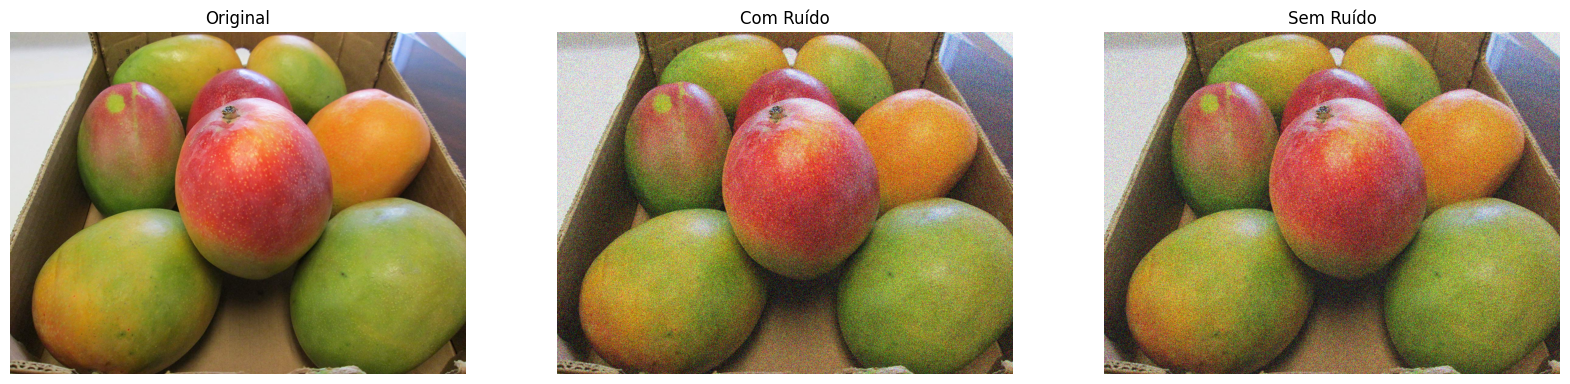

In [26]:
def add_noise(image, mean=0, stddev=25):
    """Adiciona ruído gaussiano à imagem."""
    row, col, ch = image.shape
    gauss = np.random.normal(mean, stddev, (row, col, ch))
    noisy = image + gauss
    noisy = np.clip(noisy, 0, 255)  # Garante que os valores fiquem dentro do intervalo [0, 255]
    return noisy.astype(np.uint8)


def remove_noise(noisy_image, n_runs = 10,  mean=0, stddev=25):
    row, col, ch = noisy_image.shape
    images = []
    for time in range(n_runs):
        gauss = np.random.normal(mean, stddev, (row, col, ch))
        clean_image = noisy_image + gauss
        clean_image = np.clip(clean_image, 0, 255)  # Garante que os valores fiquem dentro do intervalo [0, 255]
        images.append(clean_image)
    
    print(sum(images))
    return clean_image.astype(np.uint8)
    

# Carrega a imagem
image = cv2.imread('processamento_imagens/imagens/mangas.jpg')

# Adiciona ruído à imagem
noisy_image = add_noise(image, 0, 50)

# Remove o ruído da imagem com ruído
clean_image = remove_noise(noisy_image)

# Exibe a imagem original e a imagem com ruído
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
ax = axes.ravel()
ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original')
ax[0].set_axis_off()
ax[1].imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
ax[1].set_title('Com Ruído')
ax[1].set_axis_off()
ax[2].imshow(cv2.cvtColor(clean_image, cv2.COLOR_BGR2RGB))
ax[2].set_title('Sem Ruído')
ax[2].set_axis_off()





## 2) Destaque apenas os aviões utizando as imagens abaixo com as operações de imagens.

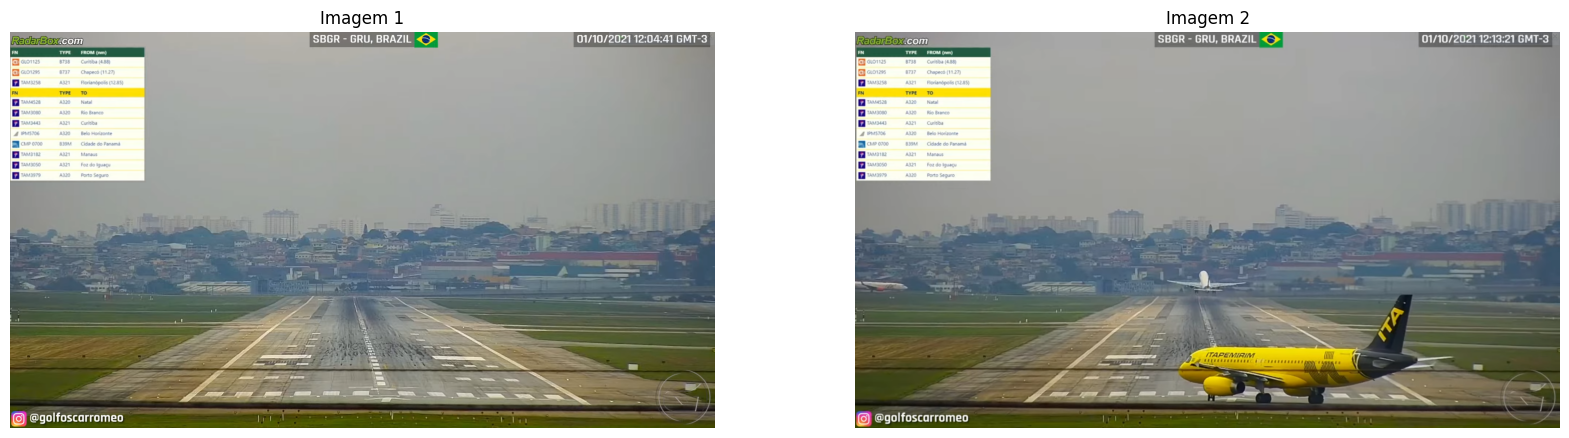

In [7]:
imggru1 = cv2.imread('processamento_imagens/imagens/fundo_aeroporto.png')
imggru2 = cv2.imread('processamento_imagens/imagens/avies_aeroporto.png')


fig, axes = plt.subplots(1, 2, figsize=(20, 10))
ax = axes.ravel()
ax[0].imshow(cv2.cvtColor(imggru1, cv2.COLOR_BGR2RGB))
ax[0].set_title('Imagem 1')
ax[0].set_axis_off()
ax[1].imshow(cv2.cvtColor(imggru2, cv2.COLOR_BGR2RGB))
ax[1].set_title('Imagem 2')
ax[1].set_axis_off()

## 3) Utilize rotação pra tentar deixar a torre abaixo reta

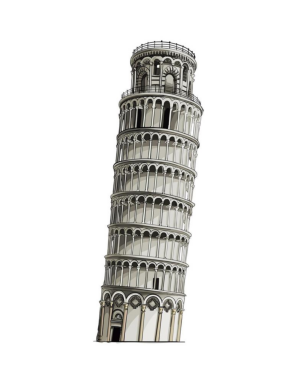

In [8]:
img = cv2.imread('processamento_imagens/imagens/pisa_inclinada.jpg')


plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## 4) Utilize as técnicas de inteporlação na imagem abaixo pra melhorar sua resolução

a) Vizinhos mais próximos
b) Bicúbica

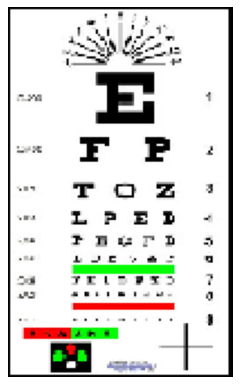

In [9]:
img = cv2.imread('processamento_imagens/imagens/baixa_resolucao.png')


plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## 5) Utilize as técnicas abaixo pra tentar melhorar a qualidade da imagem abaixo:

a) Brilho
b) Contraste
c) Equalização do histograma

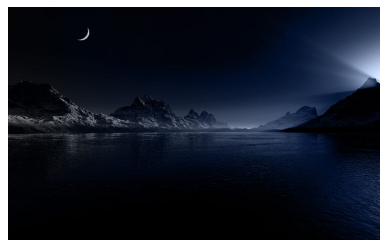

In [10]:
img = cv2.imread('processamento_imagens/imagens/paisagem_escura.jpg')


plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## 6) Utilize as técnicas de alteração de cores em cada canal para transformar a imagem original numa imagem sépia, semelhante ao exemplo.

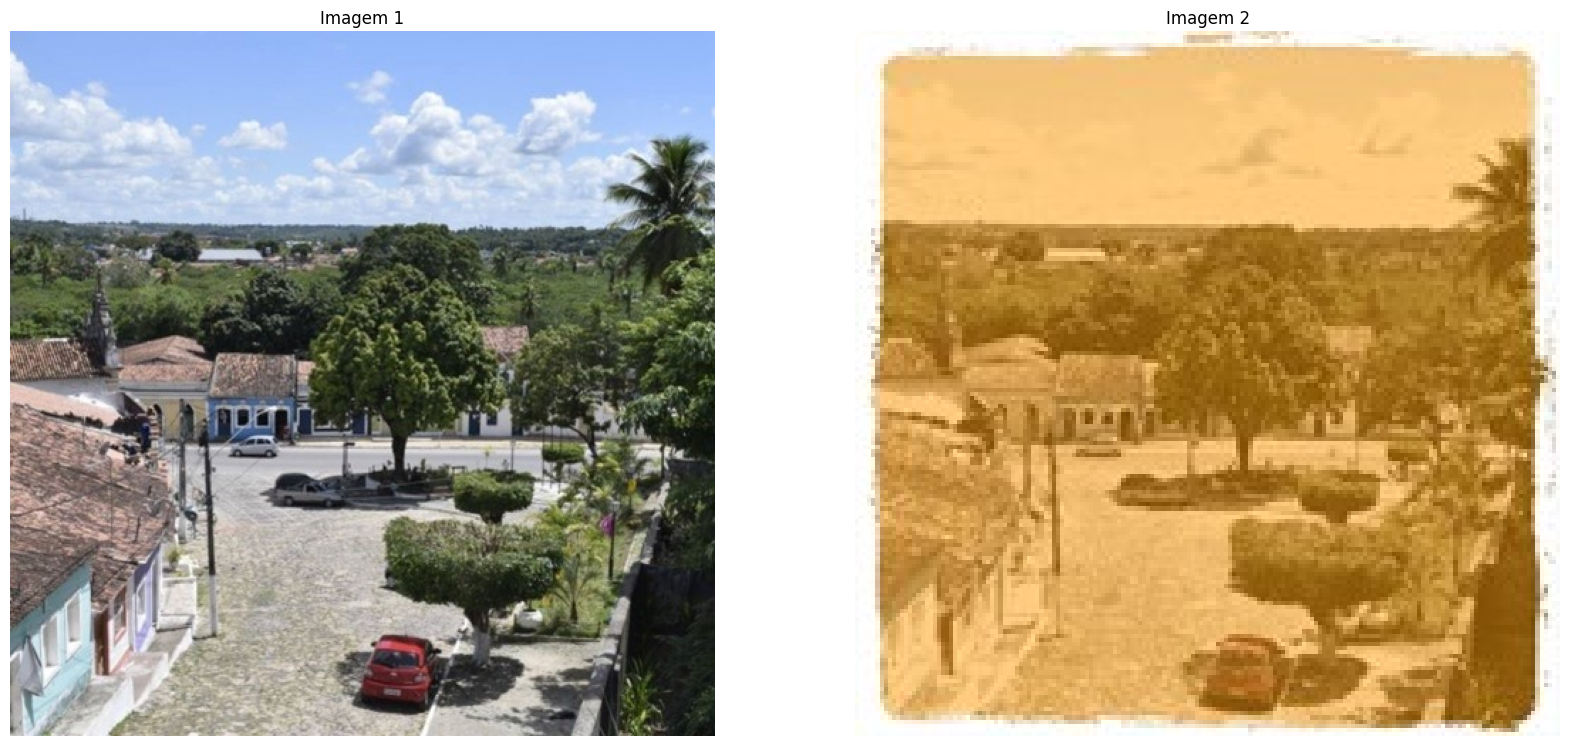

In [11]:
imggru1 = cv2.imread('processamento_imagens/imagens/igarassu.jpg')
imggru2 = cv2.imread('processamento_imagens/imagens/igarassu_sepia.jpg')


fig, axes = plt.subplots(1, 2, figsize=(20, 10))
ax = axes.ravel()
ax[0].imshow(cv2.cvtColor(imggru1, cv2.COLOR_BGR2RGB))
ax[0].set_title('Imagem 1')
ax[0].set_axis_off()
ax[1].imshow(cv2.cvtColor(imggru2, cv2.COLOR_BGR2RGB))
ax[1].set_title('Imagem 2')
ax[1].set_axis_off()

## 7) Utilize as técnicas de binarização para encontrar a melhor versão binarizada da imagem abaixo. Mostre comparações entre técnicas e parâmetros.

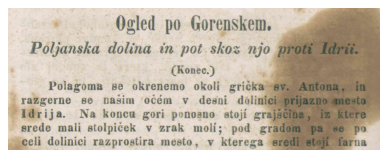

In [12]:
img = cv2.imread('processamento_imagens/imagens/PR4.bmp')


plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))